In [ ]:
import torch
import pandas as pd
import numpy as np
import os
import torch.utils
import torchvision.transforms
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from PIL import ImageDraw, Image
%matplotlib inline

torch.set_printoptions(threshold=1000)

In [ ]:
Dataset_dir = "../Cyclist_Detection/Dataset"

In [99]:
#Writing our Dataset class
class YoloPtDataset(torch.utils.data.Dataset):
    """Dataset with tensor format images and Yolo format labels"""

    def __init__(self,root_dir,data_type=None,transform=None):
        if data is None:
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a src file with the paths to all the images")
        elif data_type == 'train' or data_type == 'Train':
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","train_src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a train_src file with the paths to all the images")

        elif data_type == 'val' or data_type == 'Validate' or data_type == 'validate':
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","val_src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a val_src file with the paths to all the images")

        elif data_type == 'test' or data_type == 'Test':
            try:
                self.paths = pd.read_csv(os.path.join(root_dir,"src","test_src.csv"))
                self.paths.values.astype(str)
            except:
                raise TypeError("The directory doesn't have a test_src file with the paths to all the images")



        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path, label_path = self.paths.iloc[idx,1:].values

        return torch.load(img_path),torch.load(label_path)

In [ ]:
def yolo_to_xy(yolo,resolution):
    xy = []
    x_cent = float(yolo[1]*resolution[1])
    y_cent = float(yolo[2]*resolution[0])
    width = float(yolo[3]*resolution[1])
    height = float(yolo[4]*resolution[0])
    xy.append(x_cent-(width/2))
    xy.append(y_cent-(height/2))
    xy.append(x_cent+(width/2))
    xy.append(y_cent+(height/2))
    return xy

In [64]:
def Display_yolo(data):

    img, label = data[0],data[1]

    #Removing negative padding
    for i in range(len(label)):
        if label[i][0] == -1:
            label = label[0:i]
            break

    resolution = img.size()[1:3]
    trans = torchvision.transforms.ToPILImage()
    img = trans(img)
    draw = ImageDraw.Draw(img)

    #Removing the padded elements in he


    #Re-calculates the yolo format to top-left and bottom right points
    for i in range(len(label)):
        draw.rectangle(yolo_to_xy(label[i],resolution))

    display(img)

In [87]:
data = YoloPtDataset(Dataset_dir)
train_iter = torch.utils.data.DataLoader(data,batch_size=4,shuffle=True)

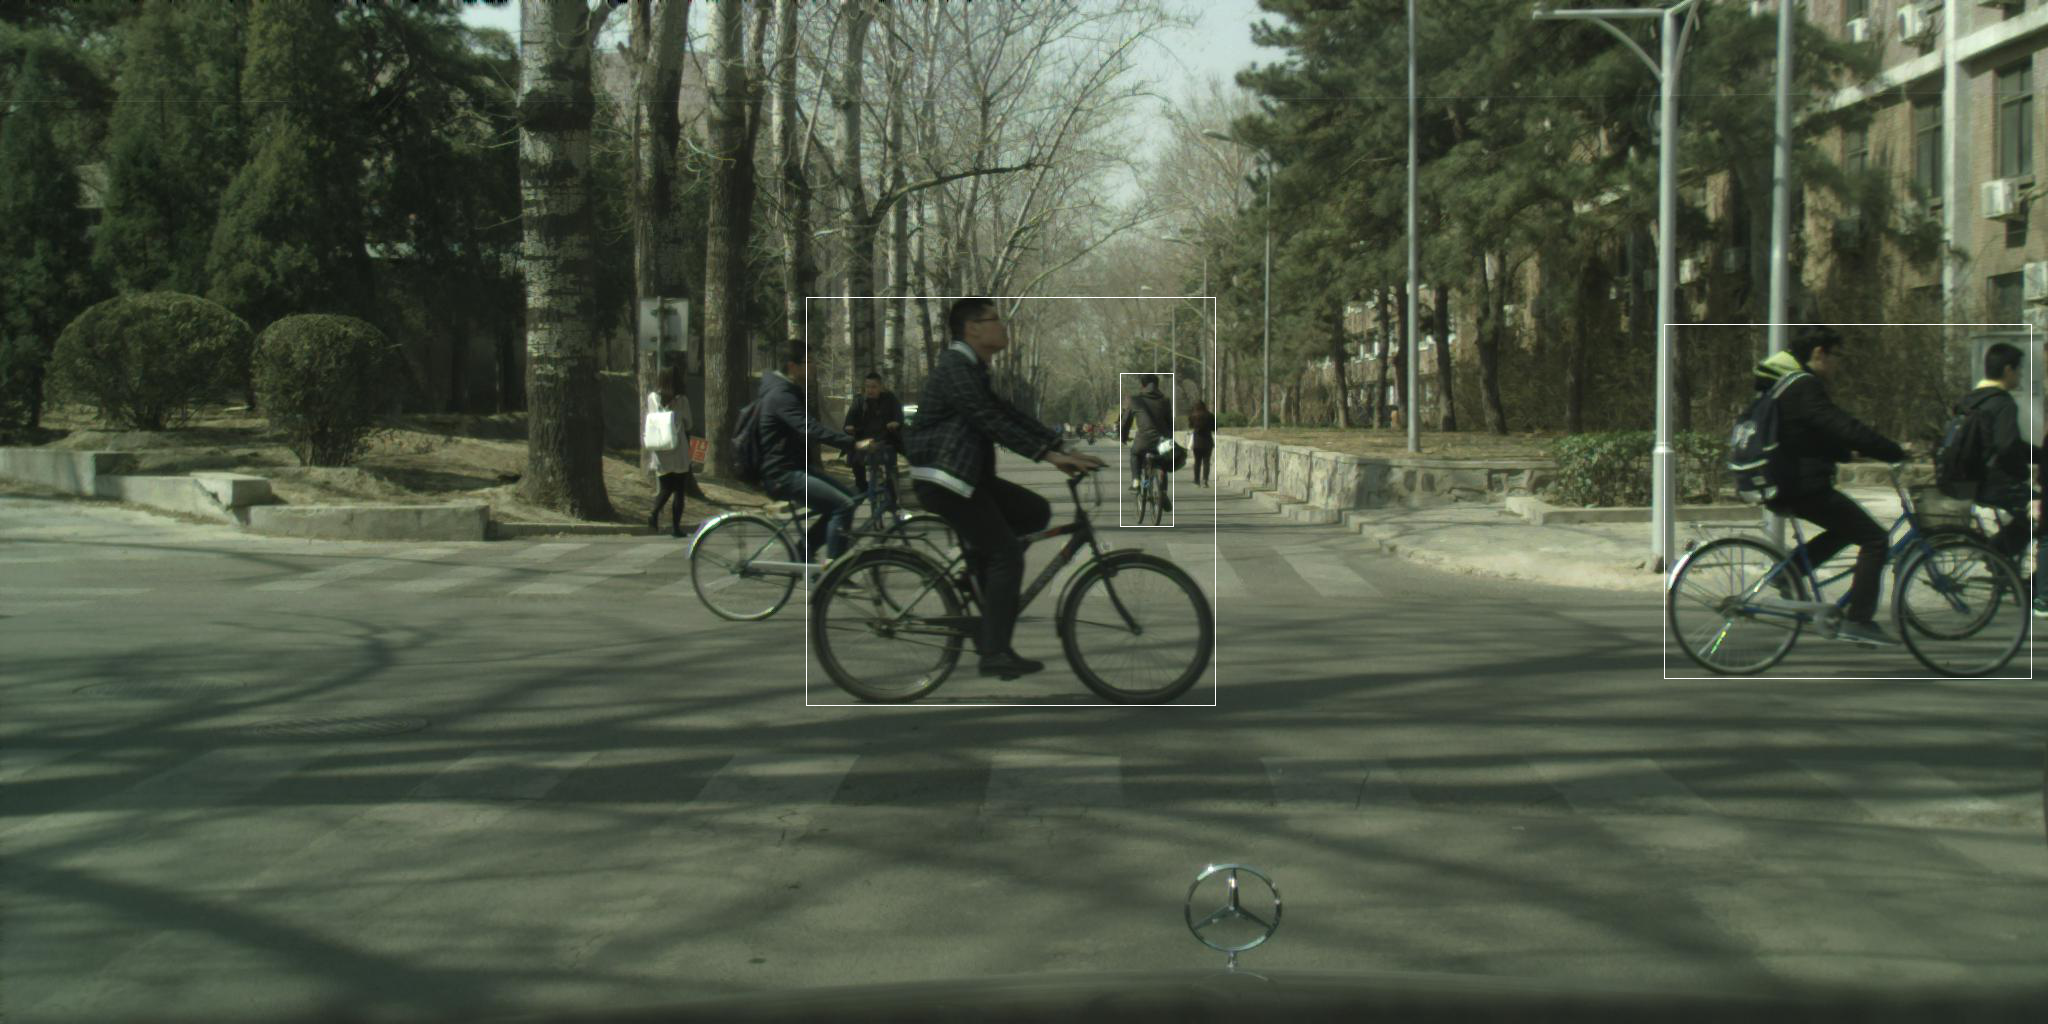

In [78]:
Display_yolo(data[10669])

In [86]:
A = [i for i in range(8205,10939)]
A

[8205,
 8206,
 8207,
 8208,
 8209,
 8210,
 8211,
 8212,
 8213,
 8214,
 8215,
 8216,
 8217,
 8218,
 8219,
 8220,
 8221,
 8222,
 8223,
 8224,
 8225,
 8226,
 8227,
 8228,
 8229,
 8230,
 8231,
 8232,
 8233,
 8234,
 8235,
 8236,
 8237,
 8238,
 8239,
 8240,
 8241,
 8242,
 8243,
 8244,
 8245,
 8246,
 8247,
 8248,
 8249,
 8250,
 8251,
 8252,
 8253,
 8254,
 8255,
 8256,
 8257,
 8258,
 8259,
 8260,
 8261,
 8262,
 8263,
 8264,
 8265,
 8266,
 8267,
 8268,
 8269,
 8270,
 8271,
 8272,
 8273,
 8274,
 8275,
 8276,
 8277,
 8278,
 8279,
 8280,
 8281,
 8282,
 8283,
 8284,
 8285,
 8286,
 8287,
 8288,
 8289,
 8290,
 8291,
 8292,
 8293,
 8294,
 8295,
 8296,
 8297,
 8298,
 8299,
 8300,
 8301,
 8302,
 8303,
 8304,
 8305,
 8306,
 8307,
 8308,
 8309,
 8310,
 8311,
 8312,
 8313,
 8314,
 8315,
 8316,
 8317,
 8318,
 8319,
 8320,
 8321,
 8322,
 8323,
 8324,
 8325,
 8326,
 8327,
 8328,
 8329,
 8330,
 8331,
 8332,
 8333,
 8334,
 8335,
 8336,
 8337,
 8338,
 8339,
 8340,
 8341,
 8342,
 8343,
 8344,
 8345,
 8346,
 8347,

In [ ]:
data_iter = torch.utils.data.DataLoader(data,batch_size=4,shuffle=True)

In [ ]:
temp_img, temp_labels = next(iter(data_iter))

In [ ]:
temp_labels.size()

In [89]:
len(data)

13674

In [91]:
data[len(data)-1]

(tensor([[[ 97,  95, 118,  ...,  82,  81,  73],
          [ 91,  90, 110,  ...,  74,  73,  69],
          [ 80,  80,  97,  ...,  60,  58,  56],
          ...,
          [ 36,  37,  37,  ...,  23,  23,  23],
          [ 38,  38,  38,  ...,  23,  23,  23],
          [ 42,  42,  42,  ...,  23,  23,  23]],
 
         [[ 94,  94, 116,  ...,  93,  90,  82],
          [ 90,  89, 111,  ...,  85,  82,  78],
          [ 81,  81, 100,  ...,  71,  67,  65],
          ...,
          [ 44,  45,  45,  ...,  28,  28,  28],
          [ 46,  46,  46,  ...,  28,  28,  28],
          [ 50,  50,  50,  ...,  28,  28,  28]],
 
         [[ 77,  76, 101,  ...,  76,  71,  63],
          [ 72,  71,  95,  ...,  68,  65,  59],
          [ 63,  63,  83,  ...,  54,  50,  48],
          ...,
          [ 31,  32,  32,  ...,  24,  24,  24],
          [ 33,  33,  33,  ...,  24,  24,  24],
          [ 37,  37,  37,  ...,  24,  24,  24]]], dtype=torch.uint8),
 tensor([[ 0.0000,  0.6484,  0.4419,  0.0225,  0.1240],
       

In [96]:
A = [i for i in range(0,10)]

In [97]:
print(A[0:3])
print(A[3:7])
print(A[7:len(A)])

[0, 1, 2]
[3, 4, 5, 6]
[7, 8, 9]


In [93]:
A = [0.6,0.2,0.2]
sum(A) == 1

True

In [94]:
isinstance(A,list)

True

In [256]:
dataloader = torch.utils.data.DataLoader(data,batch_size=4,shuffle=True)

In [259]:
temp_img, temp_labels = next(iter(dataloader))

RuntimeError: stack expects each tensor to be equal size, but got [3, 5] at entry 0 and [0, 5] at entry 1